# Image Segmentation with Watershed Algorithm

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("../data/blue-green-2d-floor-plan.jpg")

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255, 
                            cv2.THRESH_BINARY_INV + 
                            cv2.THRESH_OTSU)

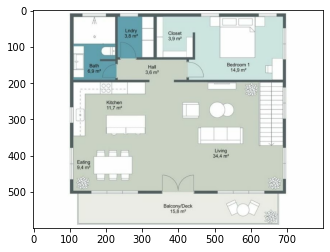

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));plt.show()

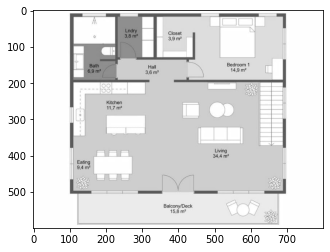

In [19]:
plt.imshow(gray, cmap="gray"); plt.show()

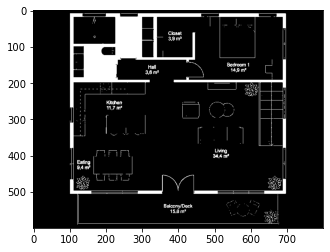

array([  0, 255], dtype=uint8)

In [20]:
plt.imshow(thresh, cmap="gray"); plt.show()
np.unique(thresh)

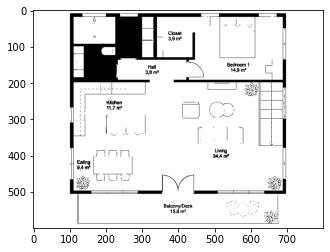

In [25]:
plt.imshow(thresh, cmap="gray_r"); plt.show()

In [26]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,
                     kernel,
                     iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,
                                       cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,
                             0.7*dist_transform.max(),
                             255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

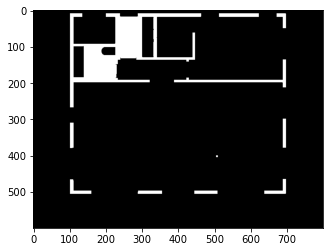

In [31]:
plt.imshow(opening, cmap="gray"); plt.show()

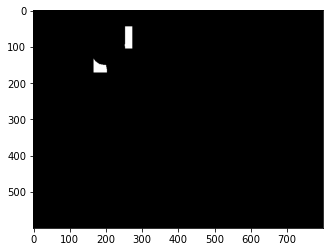

In [30]:
plt.imshow(sure_fg, cmap="gray"); plt.show()

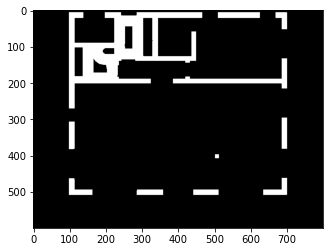

In [29]:
plt.imshow(unknown, cmap="gray"); plt.show()